# 11. 어제 오른 내 주식, 과연 내일은?

## 1-9. 프로젝트 : 주식 예측에 도전해 보자

- 1. NVDA
- 2. AMD
- 3. INTEL

# INTEL
![](https://img2.quasarzone.com/editor/2020/07/26/03e1a4f2ea626dddf5ad534c74254418.png)
[INTC Stock Status](https://finance.yahoo.com/quote/INTC?p=INTC&.tsrc=fin-srch)

# STEP 1 : 시계열 데이터 준비
- 라이브러리 로드
- 데이터 셋 로드
- 데이터 크기
- 데이터 정보
- info()함수 활용 - 정보 확인
- 종가(Close)만 앞부분 출력 확인

In [4]:
#라이브러리 로드
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#데이터셋 로드
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/INTC.csv'
df = pd.read_csv(dataset_filepath)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-17,61.490002,62.189999,61.209999,61.849998,60.194176,21055400
1,2021-02-18,60.650002,61.980000,60.639999,61.610001,59.960606,17846100
2,2021-02-19,61.910000,63.259998,61.849998,63.009998,61.323120,28290100
3,2021-02-22,61.880001,62.700001,60.660000,60.709999,59.084698,32288200
4,2021-02-23,60.480000,61.500000,59.169998,61.119999,59.483719,27374600


In [6]:
# 데이터 크기
df.shape

(254, 7)

In [7]:
#데이터 정보
df.info

<bound method DataFrame.info of            Date       Open       High        Low      Close  Adj Close  \
0    2021-02-17  61.490002  62.189999  61.209999  61.849998  60.194176   
1    2021-02-18  60.650002  61.980000  60.639999  61.610001  59.960606   
2    2021-02-19  61.910000  63.259998  61.849998  63.009998  61.323120   
3    2021-02-22  61.880001  62.700001  60.660000  60.709999  59.084698   
4    2021-02-23  60.480000  61.500000  59.169998  61.119999  59.483719   
..          ...        ...        ...        ...        ...        ...   
249  2022-02-10  49.180000  49.930000  48.759998  48.860001  48.860001   
250  2022-02-11  48.950001  49.110001  47.500000  47.630001  47.630001   
251  2022-02-14  47.919998  48.180000  47.110001  47.580002  47.580002   
252  2022-02-15  47.700001  48.459999  47.189999  48.439999  48.439999   
253  2022-02-16  48.060001  48.490002  47.599998  48.230000  48.230000   

       Volume  
0    21055400  
1    17846100  
2    28290100  
3    32288200  

> # info()함수 활용 - 정보 확인
- 각 행, 컬럼, 인텍스, 결측치, 타입, 메모리 사용, 데이터 범위 등 다양한 정보를 확인
    - 254씩 행이 들어가 있는 걸 확인 할 수 있으며
    - 결측치가 없는 걸로 보여지며
    - 타입은 Date : object , Volume : int64 정수이고 그외에 타입은 float64 소수인 걸 확인

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
# 종가(Close)만 앞부분 출력 확인
ts = df['Close']

ts.head()

0    61.849998
1    61.610001
2    63.009998
3    60.709999
4    61.119999
Name: Close, dtype: float64

# STEP 2 : 각종 전처리 수행
- 결측치 처리
- 로그 변환

In [10]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [11]:
# 로그 변환 시도 
ts_log = np.log(ts)

# STEP 3 : 시계열 안정성 분석
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [12]:
# 정성적 그래프 분석
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean() # 이동 평균 시계열
    rolstd = timeseries.rolling(window=window).std() # 이동 표준편차 시계열
    
    # 원본 시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Derivatioin")
    plt.show(block = False)

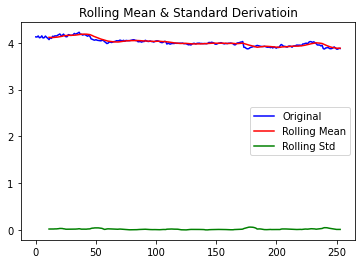

In [13]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

In [15]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [16]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.677306
p-value                          0.442841
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


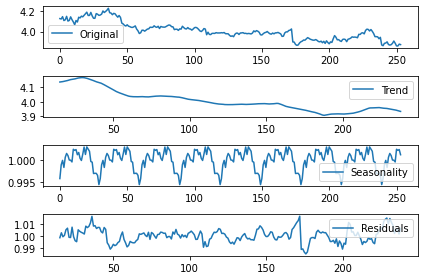

In [17]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [18]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.267748
p-value                          0.000006
#Lags Used                       2.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


# STEP 5 : 적정 ARIMA 모수 찾기
- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기
    - 1차분 구하기
    - 2차분 구하기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1080x288 with 0 Axes>

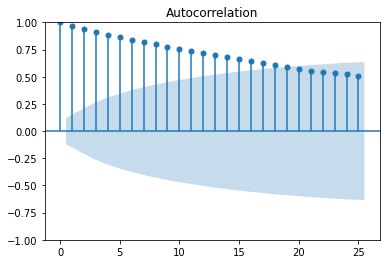

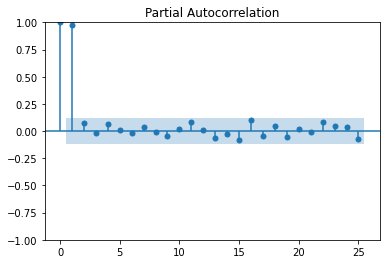

In [21]:
# 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ACF, PACF 그려보기 -> p,q 구하기
plt.figure(figsize=(15,4))
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -1.745152e+01
p-value                        4.649886e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


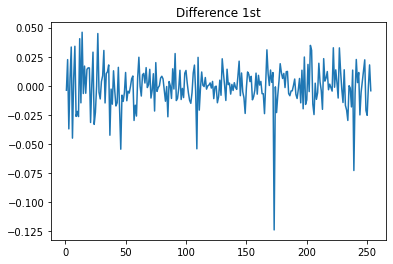

In [22]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.885148e+00
p-value                        4.590895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


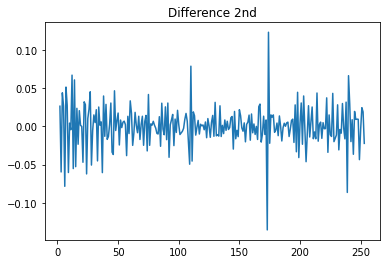

In [23]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# STEP 6 : ARIMA 모델 훈련과 테스트
- 학습 데이터 분리
- 데이터셋의 형태 확인
- 경고 무시
- ARIMA 모델 빌드와 훈련
    - Build Model
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [24]:
# 학습 데이터 분리 : 학습 데이터와 테스트 데이터를 분리 / 분리 비율은 학습과 테스트에 9:1
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

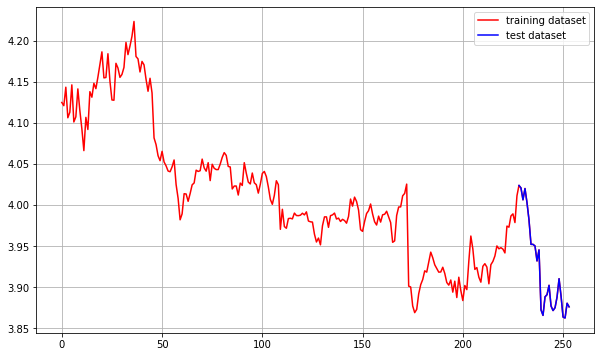

In [25]:
# 데이터셋의 형태 확인
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [26]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

0    4.124712
1    4.120824
Name: Close, dtype: float64
(228,)
(26,)


In [27]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

# ARIMA 모델 빌드와 훈련
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 594.424
Date:                Thu, 17 Feb 2022   AIC                          -1178.848
Time:                        13:38:48   BIC                          -1161.701
Sample:                             0   HQIC                         -1171.930
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0314      0.044     92.103      0.000       3.946       4.117
ar.L1          1.1035      0.511      2.158      0.031       0.101       2.106
ar.L2         -0.1212      0.499     -0.243      0.8

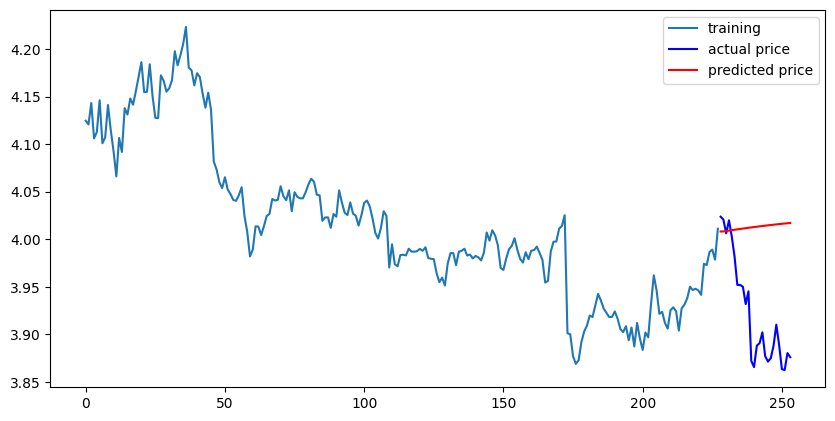

In [28]:
#모델 테스트 및 플로팅

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [29]:
# 최종 예측 모델 정확도 측정(MAPE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  30.667319267774605
MAE:  4.841161822537042
RMSE:  5.537808164587737
MAPE: 9.88%


# STEP 7 : 다른 주식 종목 예측해 보기
>최종 예측 모델 정확도 측정(MAPE)
>- MSE : 평균제곱오차 - 잔차(오차)의 제곱에 대한 평균을 취한 값
>- MAE : 평균절대오차 - 모든 절대 오차의 평균
>- RMSE: 평균제곱근 편차 - 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도
>- MAPE: 평균절대비오차 - 오차가 예측값에서 차지하는 정도를 나타내는 지표(정확도를 오차의 백분율로 표시)

- NVDA
    - MSE:  685.3606703300916
    - MAE:  21.593667039906936
    - RMSE:  26.179394002346417
    - MAPE: 9.09%
- AMD
    - MSE:  152.3992766009352
    - MAE:  10.062945171091057
    - RMSE:  12.345010190394142
    - MAPE: 8.74%
- INTEL
    - MSE:  30.667319267774605
    - MAE:  4.841161822537042
    - RMSE:  5.537808164587737
    - MAPE: 9.88%

# 회고
- 구현 완료!
- MAPE: 15%이하로 미만의 정확도로 예측함
    - 10%이하로 정확도 예측함
        - NVDA
            - MAPE: 9.09%
        - AMD
            - MAPE: 8.74%
        - INTEL
            - MAPE: 9.88%
        

- 구현은 완료하였으나 더 많은 이해가 필요하다.